# Information Theory Lab 4
## Sofya Aksenyuk, 150284

In [102]:
import string
import random
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [103]:
main_files_path = 'C:/Users/1625203/Desktop/IT/Lab/lab3/norm_wiki_{}.txt'
files = ['en', 'eo', 'et', 'so', 'ht', 'la', 'nv']
paths = []
for file in files:
    paths.append(main_files_path.format(file))
main_samples_path = 'C:/Users/1625203/Desktop/IT/Lab/lab3/sample{}.txt'
for i in range(6):
    paths.append(main_samples_path.format(i))

In [114]:
def counterChars(path, ranks):
    counts = [dict() for i in range(ranks + 1)]
    total = []
    f = open(path).read()
    alphabet = list(string.ascii_lowercase + ' ' + '0123456789')
    l1 = [''.join(i) for i in combinations(alphabet, 2)]
    l2 = [''.join(i) for i in combinations(alphabet, 3)]
    l3 = [''.join(i) for i in combinations(alphabet, 4)]
    l0 = alphabet
    l = [l0, l1, l2, l3]
    for i in f:
        if i == '':
            break
        for k in range(len(l)):
            for j in range(len(l[k])):
                amount = i.count(l[k][j])
                if amount != 0:
                    counts[k][l[k][j]] = amount
            total.append(sum(counts[k].values()))
    return counts, total

def entropyChars(path, ranks):
    counts = counterChars(path, ranks)[0]
    total = counterChars(path, ranks)[1]
    entropy = [dict() for x in range(ranks + 1)]
    for i in counts[0]:
        if i not in entropy[0]:
            entropy[0][i] = counts[0][i] / total[0] * np.log2(total[0] / counts[0][i])
        if i in entropy[0]:
            entropy[0][i] += counts[0][i] / total[0] * np.log2(total[0] / counts[0][i])  

    for i in range(1, ranks + 1):
        for j in counts[i]:
            before = j[:-1]
            if j not in entropy[i]:
                entropy[i][j] = counts[i][j] / total[i] * np.log2(counts[i - 1][before] / counts[i][j])
            if j in entropy[i]:
                entropy[i][j] += counts[i][j] / total[i] * np.log2(counts[i - 1][before] / counts[i][j])
    out = []
    for i in range(len(entropy)):
        out.append(sum(entropy[i].values()))
    return out

## Conditional entropy depending on chars:

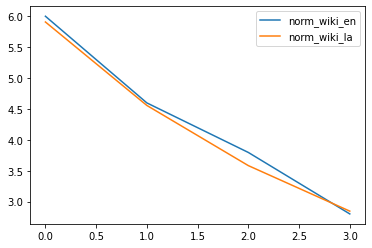

In [153]:
xpoints = [0, 1, 2, 3]
ypoints = entropyChars('C:/Users/1625203/Desktop/IT/Lab/lab3/norm_wiki_en.txt', 3)
plt.plot(np.array(xpoints), np.array(ypoints), label="norm_wiki_en")
plt.legend()
ypoints = entropyChars('C:/Users/1625203/Desktop/IT/Lab/lab3/norm_wiki_la.txt', 3)
plt.plot(np.array(xpoints), np.array(ypoints), label="norm_wiki_la")
plt.show()

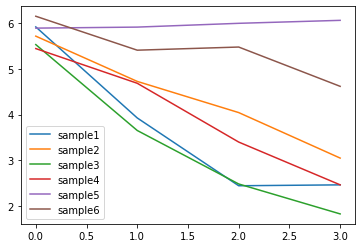

In [106]:
i = 0
for samps in range(7, len(paths)):
    ypointsSamps = entropyChars(paths[samps], 3)
    i += 1
    plt.plot(np.array(xpoints), np.array(ypointsSamps), label="sample{}".format(i))
plt.legend()
plt.show()

## Conditional entropy depending on words:

In [128]:
def counterWords(path, ranks):
    counts = [dict() for i in range(ranks + 1)]
    total = []
    f = open(path).read()
    alphabet = list(set(f.split()))
    for k in range(len(alphabet)):
        amount = f.count(alphabet[k])
        if amount != 0:
            counts[0][alphabet[k]] = amount
    total.append(sum(counts[0].values()))
    for j in range(1, ranks + 1):
        if j == 1:
            for c in combinations(alphabet, 2):
                amount = f.count(c[0] + ' ' + c[1])
                if amount != 0:
                    counts[j][(c[0], c[1])] = amount
        if j == 2:
            for c in combinations(alphabet, 3):
                amount = f.count(c[0] + ' ' + c[1] + ' ' + c[2])
                if amount != 0:
                    counts[j][(c[0], c[1], c[2])] = amount
        if j == 3:
            for c in combinations(alphabet, 4):
                amount = f.count(c[0] + ' ' + c[1] + ' ' + c[2] + c[3]) 
                if amount != 0:
                    counts[j][(c[0], c[1], c[2], c[3])] = amount
        total.append(sum(counts[j].values()))
    return counts, total

def entropyWords(path, ranks):
    counts = counterWords(path, ranks)[0]
    total = counterWords(path, ranks)[1]
    entropy = [dict() for x in range(ranks + 1)]
    for i in counts[0]:
        if i not in entropy[0]:
            entropy[0][i] = counts[0][i] / total[0] * np.log2(total[0] / counts[0][i])
        if i in entropy[0]:
            entropy[0][i] += counts[0][i] / total[0] * np.log2(total[0] / counts[0][i])  

    for i in range(1, ranks + 1):
        for j in counts[i]:
            l = list(j)
            l.remove(l[-1])
            if len(l) == 1:
                before = str(l[0])
            if len(l) > 1:
                before = tuple(l)
            if j not in entropy[i]:
                entropy[i][j] = counts[i][j] / total[i] * np.log2(counts[i - 1][before] / counts[i][j])
            if j in entropy[i]:
                entropy[i][j] += counts[i][j] / total[i] * np.log2(counts[i - 1][before] / counts[i][j])
    out = []
    for i in range(len(entropy)):
        out.append(sum(entropy[i].values()))
    return out

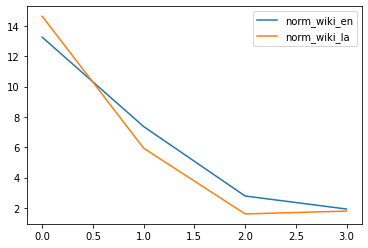

In [132]:
xpoints = [0, 1, 2, 3]
ypoints = entropyWords('C:/Users/1625203/Desktop/IT/Lab/lab3/norm_wiki_en.txt', 3)
plt.plot(np.array(xpoints), np.array(ypoints), label="norm_wiki_en")
plt.legend()
ypoints = entropyWords('C:/Users/1625203/Desktop/IT/Lab/lab3/norm_wiki_la.txt', 3)
plt.plot(np.array(xpoints), np.array(ypoints), label="norm_wiki_la")
plt.legend()
plt.show()

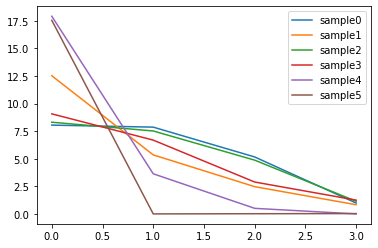

In [135]:
i = 0
for samps in range(7, len(paths)):
    ypointsSamps = entropyWords(paths[samps], 3)
    plt.plot(np.array(xpoints), np.array(ypointsSamps), label="sample{}".format(i))
    i += 1
plt.legend()
plt.show()

**Answer: According to the graphs above, it can be noticed that file named `sample4` is *not* written in natural languages since its conditional entropy value does *not* decrease as order becomes higher. At the same time, conditional entropy by words decreases dramatically to 0 for `sample5` which lets us state that it is *not* natural language as well. Apart from `sample5`, you can notice some kind of *fluctuating* of `sample0` and `sample2` on the graph above. Considering this, I would assume `sample0` and `sample2` to be written in non-natural language as well. As for other files, namely, all `norm_wiki_*` ones and `sample1` and `sample3`, seem to be written in *natural* languages since their results show expected-from-natural-language decreasing conditional entropy both - by words and by chars.**